<a href="https://colab.research.google.com/github/1801310khm/knu_bdna_2022/blob/main/%EA%B9%80%ED%98%84%EB%AF%BC_11%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [288]:
! pip install xgboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [291]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.linear_model import Ridge
from matplotlib.ticker import LinearLocator
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

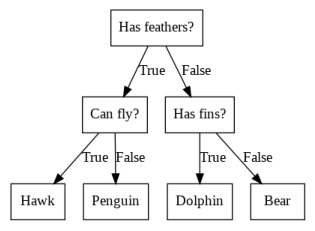

In [147]:
mglearn.plots.plot_animal_tree()

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [149]:
cancer = load_breast_cancer()

In [150]:
X_train,X_test,y_train,y_test= train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [151]:
tree = DecisionTreeClassifier(random_state=0)

In [152]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [153]:
print("Traning Accuracy: {:.3f}".format(tree.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(tree.score(X_test,y_test)))

Traning Accuracy: 1.000
Test Accuracy: 0.937


In [154]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [155]:
print("Traning Accuracy: {:.3f}".format(tree.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(tree.score(X_test,y_test)))

Traning Accuracy: 0.988
Test Accuracy: 0.951


In [156]:
from sklearn.tree import export_graphviz

In [157]:
export_graphviz(tree, out_file='tree.dot', class_names=["0","1"])

In [158]:
import graphviz

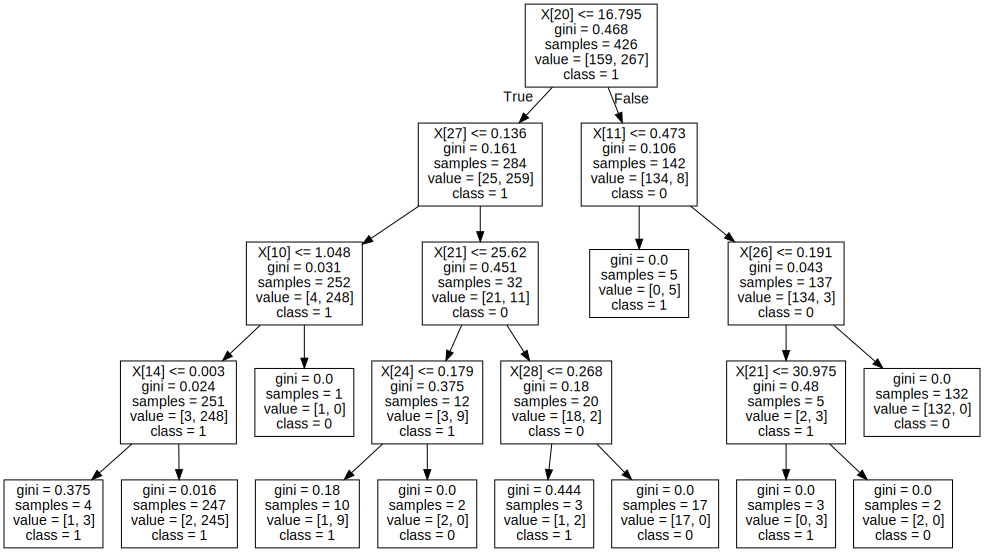

In [159]:
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [160]:
export_graphviz(tree, out_file='tree.dot', class_names=["0","1"],feature_names=cancer.feature_names, impurity= False,filled=True)

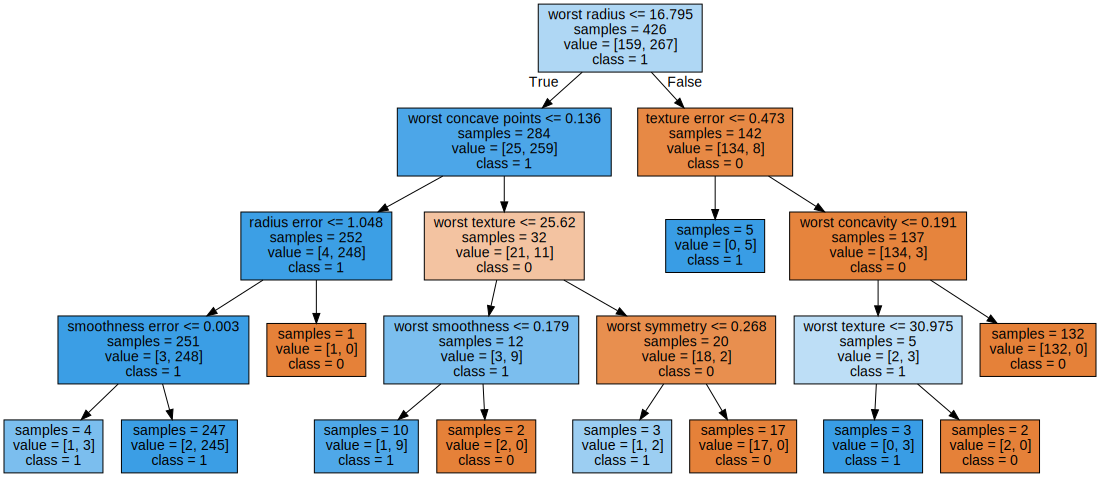

In [161]:
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [162]:
print("Feature importacne: \n",tree.feature_importances_)

Feature importacne: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


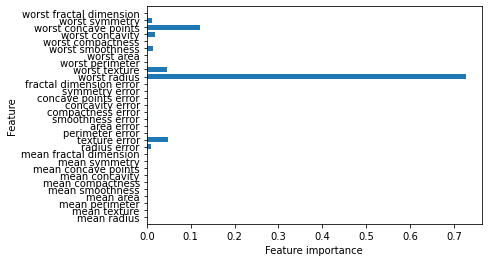

In [163]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [164]:
from sklearn.datasets import load_boston

In [254]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [166]:
X_train,X_test,y_train,y_test= train_test_split(boston.data, boston.target,random_state=42)

In [167]:
tree = DecisionTreeRegressor(random_state=0)

In [168]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

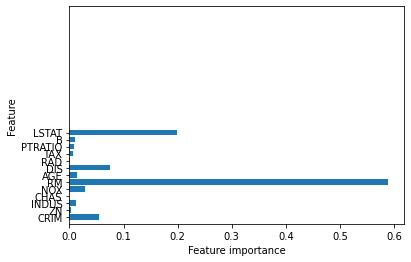

In [169]:
n_feature=boston.data.shape[1]
plt.barh(np.arange(n_feature),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_feature),boston.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

In [170]:
X,y=make_moons(n_samples=100, noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

In [260]:
forest=RandomForestClassifier(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [261]:
print('Training Accuracy:{:.3f}'.format(forest.score(X_train,y_train)))
print('Test Accurcy:{:.3f}'.format(forest.score(X_test,y_test)))

Training Accuracy:0.995
Test Accurcy:0.937


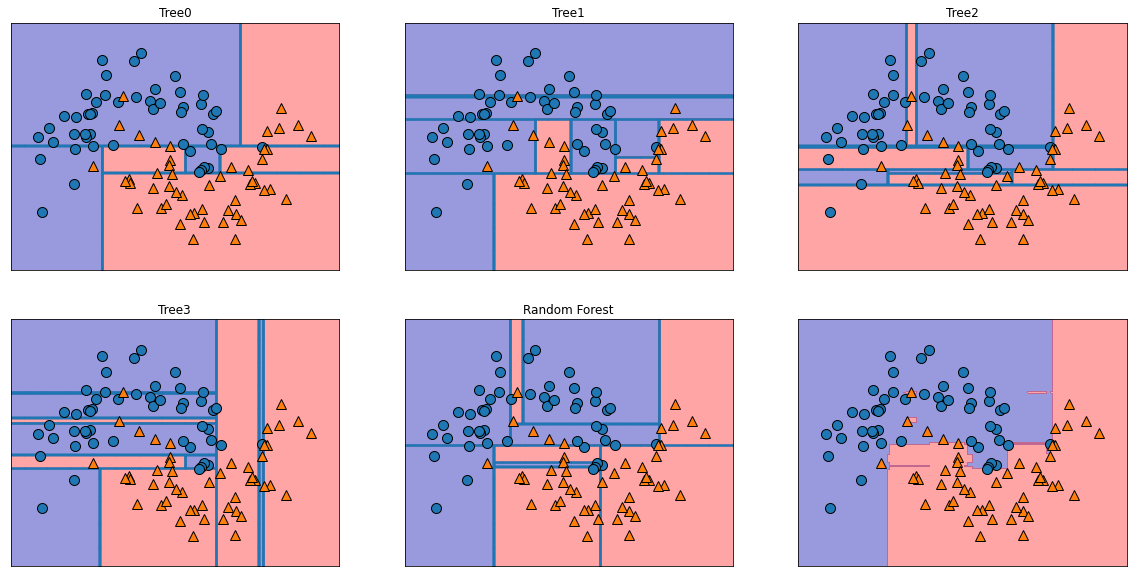

In [173]:
fig, axes = plt.subplots(2,3 ,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
  ax.set_title("Tree{}".format(i))
  mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,1].set_title('Random Forest')  
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [251]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [262]:
X_train, X_test, y_train,y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target ,random_state=0)

In [263]:
forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Training Accuracy: {:.3f}'. format(forest.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.  format(forest.score(X_test, y_test)))	

Training Accuracy: 1.000
Test Accuracy: 0.951


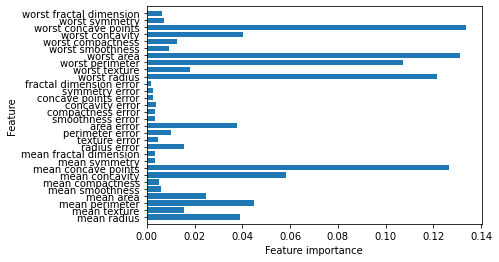

In [177]:
n_feature=cancer.data.shape[1]
plt.barh(np.arange(n_feature),forest.feature_importances_,align='center')
plt.yticks(np.arange(n_feature),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

In [269]:
gb=GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)
print('Training Accuracy:{:.3f}'.format(gb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'. format(gb.score(X_test, y_test)))

Training Accuracy:1.000
Test Accuracy: 0.958


In [270]:
gb=GradientBoostingClassifier(max_depth=1,random_state=0)
gb.fit(X_train,y_train)
print('Training Accuracy:{:.3f}'.format(gb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'. format(gb.score(X_test, y_test)))

Training Accuracy:0.995
Test Accuracy: 0.965


In [298]:
gb=GradientBoostingClassifier(max_depth=4, learning_rate=0.01,n_estimators=300,random_state=0)
gb.fit(X_train,y_train)
print('Training Accuracy:{:.3f}'.format(gb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'. format(gb.score(X_test, y_test)))

Training Accuracy:1.000
Test Accuracy: 0.944


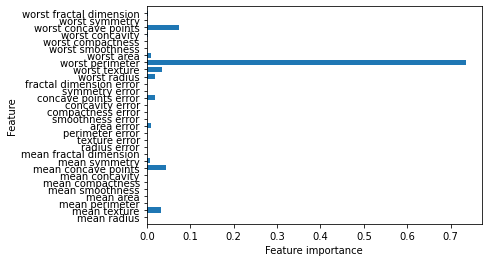

In [278]:
n_feature=cancer.data.shape[1]
plt.barh(np.arange(n_feature),gb.feature_importances_,align='center')
plt.yticks(np.arange(n_feature),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

In [299]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print('Training Accuracy:{:.3f}'.format(xgb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'. format(xgb.score(X_test, y_test)))

Training Accuracy:1.000
Test Accuracy: 0.965


In [300]:
xgb = XGBClassifier(max_depth=4, learning_rate=0.01,n_estimators=100,random_state=0)
xgb.fit(X_train,y_train)
print('Training Accuracy:{:.3f}'.format(xgb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'. format(xgb.score(X_test, y_test)))

Training Accuracy:0.998
Test Accuracy: 0.937


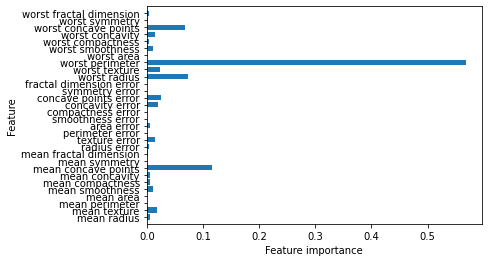

In [302]:
n_feature=cancer.data.shape[1]
plt.barh(np.arange(n_feature),xgb.feature_importances_,align='center')
plt.yticks(np.arange(n_feature),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()